In [1]:
import healpy as hp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

# Handle white noise with healpy 1 Full sky coverage
> Simulate white noise maps and use hitmaps
- categories: [cosmology, python, healpy]

In this series of notebooks, we will understand how to handle white noise in the case of
an experiment with sky observations which are both not-uniform and have partial sky coverage.

Let's first start assuming a sensitivity of an experiment array of detectors of $10 \mu K \sqrt(s)$.

In [2]:
# Number based on Simons Observatory SAT UHF1 array of detectors

net = 10. * u.Unit("uK * sqrt(s)")

5 years with a efficiency of 20%:

In [3]:
integration_time_total = 5 * u.year * .2

## Uniform full sky survey

As a reference, let's first start with the trivial case of uniform full sky coverage, i.e. we spend the same amount of observation time in each pixel.

In [4]:
nside = 512
npix = hp.nside2npix(nside)

In [5]:
standard_deviation_per_pixel = (net / np.sqrt(integration_time_total/npix)).decompose()

In [6]:
standard_deviation_per_pixel

<Quantity 3.1572473e-06 K>

In [7]:
m = np.random.normal(scale = standard_deviation_per_pixel.value, size=npix) * standard_deviation_per_pixel.unit

In [8]:
m = m.to(u.uK)

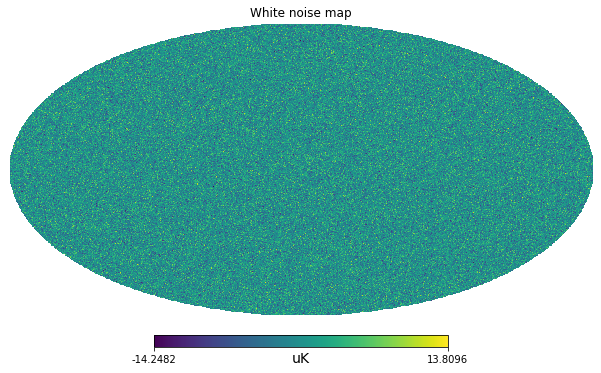

In [9]:
hp.mollview(m, unit=m.unit, title="White noise map")

## Power spectrum

Finally we can compute the angular power spectrum with `anafast`, i.e. the power as a function of the angular scales, from low $\ell$ values for large angular scales, to high $\ell$ values for small angular scales.

At low $\ell$ there is not much statistics and the power spectrum is biased, but if we exclude lower ells, we can have an estimate of the white noise $C_\ell$ coefficients. We can then compare with the theoretical power computed as:

$$ C_\ell = \Omega_{pix}\sigma^2 $$

Where: $\Omega_{pix}$ is the pixel are in square-radians and $\sigma^2$ is the white noise variance.

In [10]:
cl = hp.anafast(m)

In [11]:
cl[100:].mean()

3.9283892627207396e-05

In [12]:
m.std()

<Quantity 3.1567443 uK>

In [13]:
pixel_area = hp.nside2pixarea(nside)

In [14]:
white_noise_cl = (standard_deviation_per_pixel**2 * pixel_area).to(u.uK**2)

In [15]:
white_noise_cl

<Quantity 3.98204256e-05 uK2>

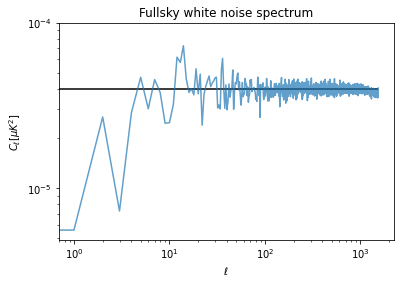

In [16]:
plt.figure(figsize=(6,4))
plt.loglog(cl, label="Map power spectrum", alpha=.7)
plt.hlines(white_noise_cl.value, 0, len(cl), label="White noise level")
plt.title("Fullsky white noise spectrum")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell [\mu K ^ 2]$");